In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.shape
raw_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Madigan, Miss. Margaret ""Maggie""",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
data = raw_data.copy()
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Pclass'] = data['Pclass'].map({1:'A', 2:'B', 3:'C'})
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# KNN method to cluster and fill missing value

In [5]:
# dropna -> reset_index
# data_no_mv = data.dropna(axis=0)
# data_no_mv = data_no_mv.reset_index(drop=True)
# data_no_mv.describe(include='all')

In [6]:
data_dropna = data.dropna(axis=0)
data_dropna = data_dropna.reset_index(drop=True)
data_dropna = data_dropna.drop(['Cabin'], axis=1)
data_dropna  = data_dropna.drop(['PassengerId'], axis=1)
data_dropna  = data_dropna.drop(['Ticket'], axis=1)
data_dropna  = data_dropna.drop(['Name'], axis=1)
data_dropna

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,A,1,38.0,1,0,71.2833,C
1,1,A,1,35.0,1,0,53.1000,S
2,0,A,0,54.0,0,0,51.8625,S
3,1,C,1,4.0,1,1,16.7000,S
4,1,A,1,58.0,0,0,26.5500,S
5,1,B,0,34.0,0,0,13.0000,S
6,1,A,0,28.0,0,0,35.5000,S
7,0,A,0,19.0,3,2,263.0000,S
8,1,A,1,49.0,1,0,76.7292,C
9,0,A,0,65.0,0,1,61.9792,C


In [7]:
from sklearn.cluster import KMeans

x = data_dropna.iloc[:,2:-1]
wcss = []

for i in range(1,10):
    # decide the cluster 1 to 6
    kmeans = KMeans(i)
    # decide the variable(x) which is used to cluster
    kmeans.fit(x)
    wc_iter = kmeans.inertia_
    wcss.append(wc_iter)

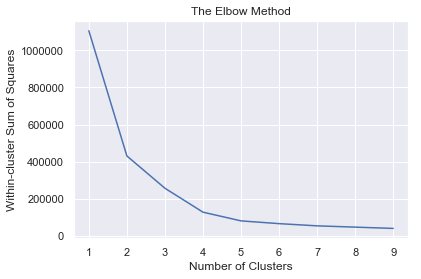

In [8]:
number_cluster = range(1,10)
plt.plot(number_cluster, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

plt.show()

In [9]:
data.columns.values
data_fill_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [10]:
data_fill = data[data_fill_columns]
data_fill

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
5,NaN,0,0,8.4583
6,54.0,0,0,51.8625
7,2.0,3,1,21.0750
8,27.0,0,2,11.1333
9,14.0,1,0,30.0708


In [11]:
from fancyimpute import KNN
X_filled_age_knn = pd.DataFrame(KNN(k=5).fit_transform(data_fill).round(0), 
                            columns=data_fill_columns)
X_filled_age_knn

Using TensorFlow backend.


Imputing row 1/891 with 0 missing, elapsed time: 0.209
Imputing row 101/891 with 0 missing, elapsed time: 0.211
Imputing row 201/891 with 0 missing, elapsed time: 0.213
Imputing row 301/891 with 1 missing, elapsed time: 0.215
Imputing row 401/891 with 0 missing, elapsed time: 0.216
Imputing row 501/891 with 0 missing, elapsed time: 0.218
Imputing row 601/891 with 0 missing, elapsed time: 0.221
Imputing row 701/891 with 0 missing, elapsed time: 0.223
Imputing row 801/891 with 0 missing, elapsed time: 0.225


,Age,SibSp,Parch,Fare
0,22.0,1.0,0.0,7.0
1,38.0,1.0,0.0,71.0
2,26.0,0.0,0.0,8.0
3,35.0,1.0,0.0,53.0
4,35.0,0.0,0.0,8.0
5,22.0,0.0,0.0,8.0
6,54.0,0.0,0.0,52.0
7,2.0,3.0,1.0,21.0
8,27.0,0.0,2.0,11.0
9,14.0,1.0,0.0,30.0


# Fill missing value

In [12]:
data_no_mv = data.copy()
data_no_mv['Age'] = X_filled_age_knn['Age']
data_no_mv['Embarked'] = data['Embarked'].fillna('S')
data_no_mv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,C,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,A,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,C,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,A,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,C,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,C,"Moran, Mr. James",0,22.0,0,0,330877,8.4583,NaN,Q
6,7,0,A,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,C,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,C,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,B,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [13]:
#data[data['Embarked'].isnull().values == True]

In [14]:
data_no_mv = data_no_mv.drop(['Cabin'], axis=1)
data_no_mv  = data_no_mv.drop(['PassengerId'], axis=1)
data_no_mv  = data_no_mv.drop(['Ticket'], axis=1)
data_no_mv  = data_no_mv.drop(['Name'], axis=1)

In [15]:
data_no_mv.shape

(891, 8)

In [16]:
data_dummies = pd.get_dummies(data_no_mv)
data_dummies

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1
5,0,0,22.0,0,0,8.4583,0,0,1,0,1,0
6,0,0,54.0,0,0,51.8625,1,0,0,0,0,1
7,0,0,2.0,3,1,21.0750,0,0,1,0,0,1
8,1,1,27.0,0,2,11.1333,0,0,1,0,0,1
9,1,1,14.0,1,0,30.0708,0,1,0,1,0,0


In [17]:
targets = data_dummies['Survived']
targets

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
unscaled_inputs = data_dummies.iloc[:,1:]
unscaled_inputs

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,1
5,0,22.0,0,0,8.4583,0,0,1,0,1,0
6,0,54.0,0,0,51.8625,1,0,0,0,0,1
7,0,2.0,3,1,21.0750,0,0,1,0,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,0,1
9,1,14.0,1,0,30.0708,0,1,0,1,0,0


In [19]:
unscaled_inputs.shape

(891, 11)

# Standardize

In [20]:
# with dummy variables

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
# you dont need to understand, you only need to know how to use
class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [21]:
unscaled_inputs.columns.values

array(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_A', 'Pclass_B',
       'Pclass_C', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [22]:
column_to_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [23]:
titanic_scaler = CustomScaler(column_to_scale)

In [24]:
titanic_scaler.fit(unscaled_inputs)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Age', 'SibSp', 'Parch', 'Fare'], copy=None,
             with_mean=None, with_std=None)

In [25]:
scaled_inputs = titanic_scaler.transform(unscaled_inputs)

In [26]:
scaled_inputs.shape

(891, 11)

In [27]:
scaled_inputs

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.584272,0.432793,-0.473674,-0.502445,0,0,1,0,0,1
1,1,0.596029,0.432793,-0.473674,0.786845,1,0,0,1,0,0
2,1,-0.289197,-0.474545,-0.473674,-0.488854,0,0,1,0,0,1
3,1,0.374723,0.432793,-0.473674,0.420730,1,0,0,0,0,1
4,0,0.374723,-0.474545,-0.473674,-0.486337,0,0,1,0,0,1
5,0,-0.584272,-0.474545,-0.473674,-0.478116,0,0,1,0,1,0
6,0,1.776330,-0.474545,-0.473674,0.395814,1,0,0,0,0,1
7,0,-2.059649,2.247470,0.767630,-0.224083,0,0,1,0,0,1
8,1,-0.215428,-0.474545,2.008933,-0.424256,0,0,1,0,0,1
9,1,-1.174423,0.432793,-0.473674,-0.042956,0,1,0,1,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_test_split(scaled_inputs, targets, train_size=0.8)

[     Sex       Age     SibSp     Parch      Fare  Pclass_A  Pclass_B  \
 238    0 -0.805579 -0.474545 -0.473674 -0.437007         0         1   
 467    0  1.923868 -0.474545 -0.473674 -0.113846         1         0   
 329    1 -1.026885 -0.474545  0.767630  0.518971         1         0   
 356    1 -0.584272 -0.474545  0.767630  0.458986         1         0   
 120    0 -0.658041  1.340132 -0.473674  0.831478         0         1   
 483    1  2.440250 -0.474545 -0.473674 -0.455380         0         0   
 333    0 -1.026885  1.340132 -0.473674 -0.285997         0         0   
 850    0 -1.912111  3.154809  2.008933 -0.018709         0         0   
 655    0 -0.436735  1.340132 -0.473674  0.831478         0         1   
 338    0  1.112411 -0.474545 -0.473674 -0.486337         0         0   
 798    0  0.005878 -0.474545 -0.473674 -0.502864         0         0   
 89     0 -0.436735 -0.474545 -0.473674 -0.486337         0         0   
 697    1 -0.805579 -0.474545 -0.473674 -0.492714  

In [30]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, 
                                                    train_size=0.8, random_state=330)

In [31]:
print(x_train.shape, y_train.shape)

(712, 11) (712,)


In [32]:
print(x_test.shape, y_test.shape)

(179, 11) (179,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
reg = LogisticRegression()

In [35]:
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
reg.score(x_train, y_train)

0.8174157303370787

In [37]:
model_ouputs = reg.predict(x_train)
model_ouputs

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [38]:
np.sum(model_ouputs == y_train)/ y_train.shape[0]

0.8174157303370787

In [39]:
reg.coef_[0]

array([ 2.73063792, -0.44744793, -0.32919918, -0.09406492,  0.11585019,
        1.00275041,  0.19805847, -1.20082357,  0.15545869,  0.16037532,
       -0.3158487 ])

In [40]:
reg.intercept_[0]

-1.0652011816440545

In [41]:
feature_name = unscaled_inputs.columns.values
feature_name

array(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_A', 'Pclass_B',
       'Pclass_C', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [42]:
summary_table = pd.DataFrame(columns=['feature_name'], data=feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

summary_table

,feature_name,Coefficient
0,Intercept,-1.065201
1,Sex,2.730638
2,Age,-0.447448
3,SibSp,-0.329199
4,Parch,-0.094065
5,Fare,0.115850
6,Pclass_A,1.002750
7,Pclass_B,0.198058
8,Pclass_C,-1.200824
9,Embarked_C,0.155459


In [43]:
# more high odds ratio is more important
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)

,feature_name,Coefficient,Odds_ratio
1,Sex,2.730638,15.342671
6,Pclass_A,1.002750,2.725769
7,Pclass_B,0.198058,1.219034
10,Embarked_Q,0.160375,1.173951
9,Embarked_C,0.155459,1.168194
5,Fare,0.115850,1.122828
4,Parch,-0.094065,0.910224
11,Embarked_S,-0.315849,0.729170
3,SibSp,-0.329199,0.719500
2,Age,-0.447448,0.639258


In [44]:
reg.score(x_test, y_test)

0.7877094972067039

# Save the model

In [45]:
import pickle

In [46]:
# dump means save
#with open('filename','write bytes') as file:
#    pickle.dump('object to be dumped',file)

with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [47]:
with open('scaler', 'wb') as file:
    pickle.dump(titanic_scaler, file)